In [1]:
# Import the necessary libraries for the task.
import numpy as np  # Import NumPy for numerical operations.
import torch  # Import PyTorch library for deep learning.
import torch.nn as nn  # Import neural network module from PyTorch.
import matplotlib.pyplot as plt  # Import Matplotlib for plotting.
from IPython import display  # Import IPython display for plot rendering settings.
display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


C:\Users\fafzali\AppData\Local\Temp\ipykernel_18216\1583362010.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


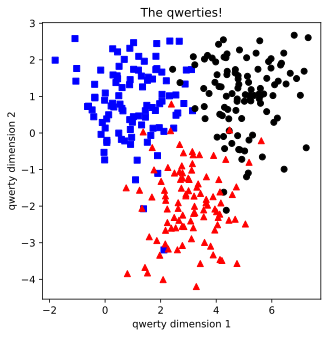

In [2]:
# Define parameters for synthetic data generation.
nPerClust = 100  # Number of samples per cluster.
blur = 1  # Standard deviation for cluster data.

# Define cluster centers A, B, and C.
A = [1, 1]
B = [5, 1]
C = [3, -2]

# Generate synthetic data points for clusters A, B, and C.
a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]
c = [C[0] + np.random.randn(nPerClust) * blur, C[1] + np.random.randn(nPerClust) * blur]

# Define true labels for the clusters.
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1)), 2 * np.ones((nPerClust, 1))))

# Concatenate the data points into a matrix.
data_np = np.hstack((a, b, c)).T

# Convert the data to a PyTorch tensor ('custom_data').
# Convert the labels to a PyTorch tensor ('custom_labels').
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# Show the synthetic data.
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.plot(data[np.where(labels == 2)[0], 0], data[np.where(labels == 2)[0], 1], 'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [3]:
# Define the architecture of the neural network ('custom_ANNq_model').
# Specify the loss function ('custom_loss_function') and optimizer ('custom_optimizer').
custom_ANNq_model = nn.Sequential(
    nn.Linear(2, 4),    # Input layer with 2 input features and 4 output units.
    nn.ReLU(),          # ReLU activation function.
    nn.Linear(4, 3),    # Output layer with 3 output units.
    nn.Softmax(dim=1),  # Softmax activation for multi-class classification.
)

custom_loss_function = nn.CrossEntropyLoss()  # Cross-entropy loss for classification.
custom_optimizer = torch.optim.SGD(custom_ANNq_model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer.


In [4]:
# Test the custom ANN model by performing a forward pass.
yHat = custom_ANNq_model(data)

# Print the shapes of the data and predictions.
print(data.shape)
print(yHat.shape)


torch.Size([300, 2])
torch.Size([300, 3])


In [5]:
# Set the number of training epochs ('custom_numepochs').
# Initialize lists for losses ('custom_losses') and ongoing accuracy ('custom_ongoing_accuracy').
custom_numepochs = 10000
custom_losses = torch.zeros(custom_numepochs)
custom_ongoing_accuracy = []

# Training loop.
for custom_epochi in range(custom_numepochs):
    # Forward pass.
    yHat = custom_ANNq_model(data)

    # Compute loss.
    custom_loss = custom_loss_function(yHat, labels)
    custom_losses[custom_epochi] = custom_loss

    # Backpropagation.
    custom_optimizer.zero_grad()
    custom_loss.backward()
    custom_optimizer.step()

    # Compute accuracy.
    custom_matches = torch.argmax(yHat, axis=1) == labels  # Booleans (false/true).
    custom_matches_numeric = custom_matches.float()  # Convert to numbers (0/1).
    custom_accuracy_pct = 100 * torch.mean(custom_matches_numeric)  # Average and x100.
    custom_ongoing_accuracy.append(custom_accuracy_pct)  # Add to list of accuracies.

# Final forward pass.
predictions = custom_ANNq_model(data)
predlabels = torch.argmax(predictions, axis=1)
custom_total_accuracy = 100 * torch.mean((predlabels == labels).float())


In [9]:
yHat

tensor([[9.9239e-01, 7.3753e-03, 2.3291e-04],
        [9.9724e-01, 2.0222e-03, 7.3732e-04],
        [9.9666e-01, 2.3858e-03, 9.5044e-04],
        [9.5491e-01, 4.3328e-02, 1.7637e-03],
        [9.8327e-01, 4.6420e-03, 1.2089e-02],
        [8.6574e-01, 8.1949e-03, 1.2607e-01],
        [9.9432e-01, 2.6944e-03, 2.9839e-03],
        [9.9060e-01, 8.4451e-03, 9.5486e-04],
        [9.9408e-01, 3.9003e-03, 2.0247e-03],
        [9.9692e-01, 2.2274e-03, 8.5621e-04],
        [9.8950e-01, 6.2649e-03, 4.2367e-03],
        [9.9637e-01, 2.5658e-03, 1.0658e-03],
        [1.2834e-02, 5.2272e-05, 9.8711e-01],
        [9.9394e-01, 3.9685e-03, 2.0940e-03],
        [9.9147e-01, 8.3817e-03, 1.4941e-04],
        [9.7658e-01, 8.3686e-03, 1.5050e-02],
        [9.5292e-01, 4.6112e-02, 9.6664e-04],
        [9.7106e-01, 2.5984e-02, 2.9564e-03],
        [9.2889e-01, 4.1325e-02, 2.9787e-02],
        [9.9849e-01, 1.4030e-03, 1.1048e-04],
        [8.7276e-01, 1.2583e-01, 1.4124e-03],
        [9.9949e-01, 4.8399e-04, 2

Final accuracy of the custom ANN model: 93.6667%


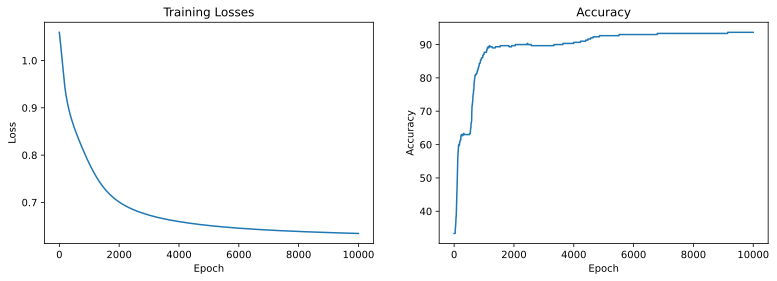

In [6]:
# Report the final accuracy of the custom ANN model.
print('Final accuracy of the custom ANN model: %g%%' % custom_total_accuracy)

# Create subplots for losses and accuracy.
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

# Plot training losses.
ax[0].plot(custom_losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Training Losses')

# Plot ongoing accuracy during training.
ax[1].plot(custom_ongoing_accuracy)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
plt.show()


In [7]:
# Confirm that all model predictions sum to 1.
torch.sum(yHat, axis=1)


tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

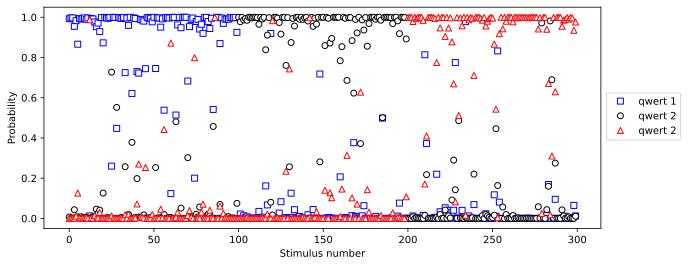

In [8]:
# Plot the raw model outputs.
fig = plt.figure(figsize=(10, 4))

colorshape = ['bs', 'ko', 'r^']
for i in range(3):
    plt.plot(yHat[:, i].detach(), colorshape[i], markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1', 'qwert 2', 'qwert 2'], loc=(1.01, 0.4))
plt.show()
